In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import joblib
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/content/drive/MyDrive/MINI PROJECT/TE_MSRtrain_combined (1).csv'
data = pd.read_csv(file_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6915 entries, 0 to 6914
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Study          6915 non-null   object 
 1   Subject        6915 non-null   object 
 2   Class          6915 non-null   int64  
 3   UPDRS          6915 non-null   float64
 4   Jitter         6915 non-null   float64
 5   Jitter(Abs)    6915 non-null   float64
 6   Jitter:RAP     6915 non-null   float64
 7   Jitter:PPQ5    6915 non-null   float64
 8   Jitter:DDP     6915 non-null   float64
 9   Shimmer        6915 non-null   float64
 10  Shimmer(dB)    6915 non-null   float64
 11  Shimmer:APQ3   6915 non-null   float64
 12  Shimmer:APQ5   6915 non-null   float64
 13  Shimmer:APQ11  6915 non-null   float64
 14  Shimmer:DDA    6915 non-null   float64
 15  NHR            6915 non-null   float64
 16  HNR            6915 non-null   float64
dtypes: float64(14), int64(1), object(2)
memory usage: 91

In [ ]:
data.describe()

,Class,UPDRS,Jitter,Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR
count,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000
mean,0.924801,26.609730,0.925819,0.000063,0.441346,0.481187,1.324048,4.834536,0.443902,2.314759,2.912162,4.171940,6.944269,0.062088,19.922857
std,0.263731,12.962753,1.131994,0.000070,0.584809,0.668051,1.754442,4.659131,0.414020,2.209818,3.230203,4.504127,6.629467,0.107427,5.987095
min,0.000000,1.000000,0.083000,0.000002,0.033000,0.043000,0.098000,0.306000,0.026000,0.161000,0.194000,0.249000,0.484000,0.000286,0.695000
25%,1.000000,19.000000,0.378500,0.000024,0.169000,0.193000,0.506000,2.050000,0.188000,0.995500,1.162000,1.680500,2.986500,0.012198,17.488000
50%,1.000000,26.583000,0.538000,0.000039,0.252000,0.275000,0.756000,3.100000,0.286000,1.551000,1.802000,2.550000,4.653000,0.021754,21.095000
75%,1.000000,34.979000,0.868500,0.000068,0.422000,0.446000,1.266000,5.246500,0.481500,2.686500,3.119000,4.210500,8.060000,0.045637,23.975500
max,1.000000,55.000000,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,44.764000,77.459000,0.869277,37.875000


In [ ]:
data.head()

,Study,Subject,Class,UPDRS,Jitter,Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR
0,TE,TE1,1,34.398,0.662,0.000034,0.401,0.317,1.204,2.565,0.230,1.438,1.309,1.662,4.314,0.014290,21.640
1,TE,TE1,1,34.894,0.300,0.000017,0.132,0.150,0.395,2.024,0.179,0.994,1.072,1.689,2.982,0.011112,27.183
2,TE,TE1,1,35.389,0.481,0.000025,0.205,0.208,0.616,1.675,0.181,0.734,0.844,1.458,2.202,0.020220,23.047
3,TE,TE1,1,35.810,0.528,0.000027,0.191,0.264,0.573,2.309,0.327,1.106,1.265,1.963,3.317,0.027837,24.445
4,TE,TE1,1,36.375,0.335,0.000020,0.093,0.130,0.278,1.703,0.176,0.679,0.929,1.819,2.036,0.011625,26.126


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6915 entries, 0 to 6914
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Study          6915 non-null   object 
 1   Subject        6915 non-null   object 
 2   Class          6915 non-null   int64  
 3   UPDRS          6915 non-null   float64
 4   Jitter         6915 non-null   float64
 5   Jitter(Abs)    6915 non-null   float64
 6   Jitter:RAP     6915 non-null   float64
 7   Jitter:PPQ5    6915 non-null   float64
 8   Jitter:DDP     6915 non-null   float64
 9   Shimmer        6915 non-null   float64
 10  Shimmer(dB)    6915 non-null   float64
 11  Shimmer:APQ3   6915 non-null   float64
 12  Shimmer:APQ5   6915 non-null   float64
 13  Shimmer:APQ11  6915 non-null   float64
 14  Shimmer:DDA    6915 non-null   float64
 15  NHR            6915 non-null   float64
 16  HNR            6915 non-null   float64
dtypes: float64(14), int64(1), object(2)
memory usage: 91

In [ ]:
# Dataset exploration
print("Dataset Information:")
print(data.info())
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6915 entries, 0 to 6914
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Study          6915 non-null   object 
 1   Subject        6915 non-null   object 
 2   Class          6915 non-null   int64  
 3   UPDRS          6915 non-null   float64
 4   Jitter         6915 non-null   float64
 5   Jitter(Abs)    6915 non-null   float64
 6   Jitter:RAP     6915 non-null   float64
 7   Jitter:PPQ5    6915 non-null   float64
 8   Jitter:DDP     6915 non-null   float64
 9   Shimmer        6915 non-null   float64
 10  Shimmer(dB)    6915 non-null   float64
 11  Shimmer:APQ3   6915 non-null   float64
 12  Shimmer:APQ5   6915 non-null   float64
 13  Shimmer:APQ11  6915 non-null   float64
 14  Shimmer:DDA    6915 non-null   float64
 15  NHR            6915 non-null   float64
 16  HNR            6915 non-null   float64
dtypes: float64(14), int64(1), objec

In [ ]:
print(data.describe())


             Class        UPDRS       Jitter  Jitter(Abs)   Jitter:RAP  \
count  6915.000000  6915.000000  6915.000000  6915.000000  6915.000000   
mean      0.924801    26.609730     0.925819     0.000063     0.441346   
std       0.263731    12.962753     1.131994     0.000070     0.584809   
min       0.000000     1.000000     0.083000     0.000002     0.033000   
25%       1.000000    19.000000     0.378500     0.000024     0.169000   
50%       1.000000    26.583000     0.538000     0.000039     0.252000   
75%       1.000000    34.979000     0.868500     0.000068     0.422000   
max       1.000000    55.000000    14.376000     0.000777     8.016000   

       Jitter:PPQ5   Jitter:DDP      Shimmer  Shimmer(dB)  Shimmer:APQ3  \
count  6915.000000  6915.000000  6915.000000  6915.000000   6915.000000   
mean      0.481187     1.324048     4.834536     0.443902      2.314759   
std       0.668051     1.754442     4.659131     0.414020      2.209818   
min       0.043000     0.098000  

In [ ]:
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 Study            0
Subject          0
Class            0
UPDRS            0
Jitter           0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
dtype: int64


In [ ]:
print("Class Distribution:\n", data['Class'].value_counts())


Class Distribution:
 Class
1    6395
0     520
Name: count, dtype: int64


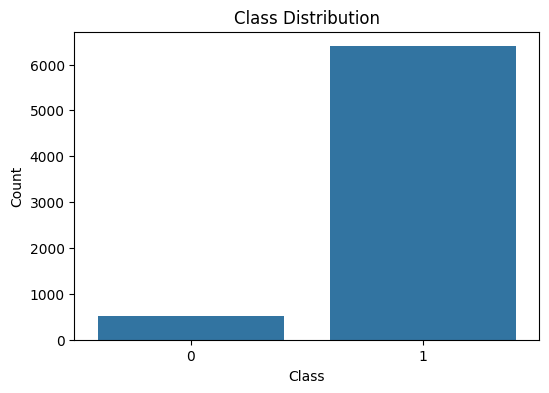

In [ ]:
# Visualizations
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



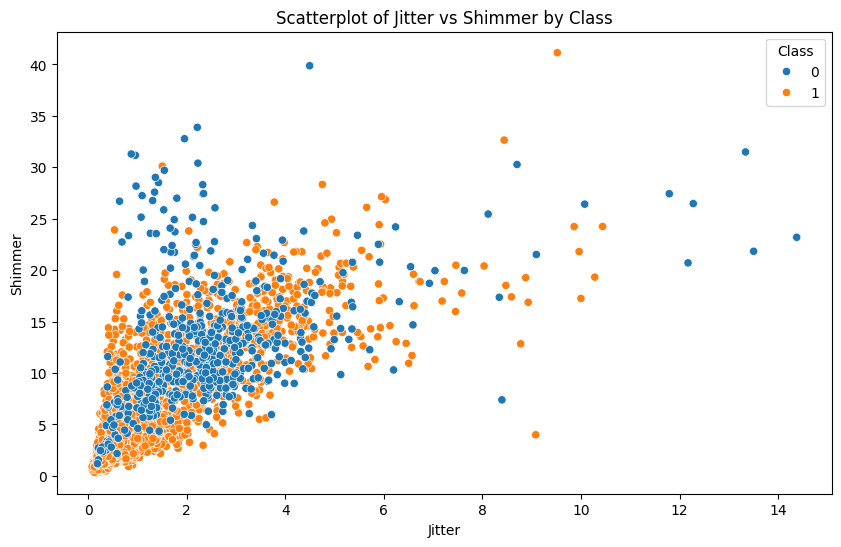

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jitter', y='Shimmer', hue='Class', data=data)
plt.title('Scatterplot of Jitter vs Shimmer by Class')
plt.xlabel('Jitter')
plt.ylabel('Shimmer')
plt.show()


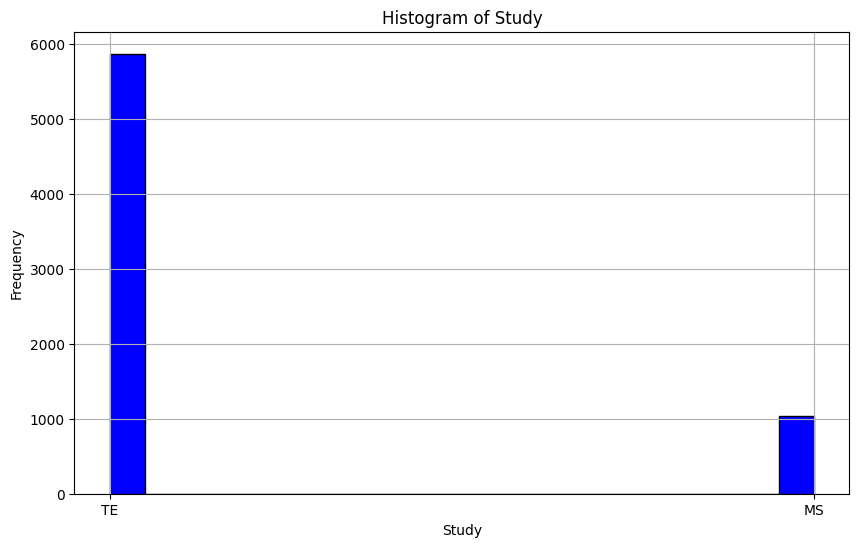

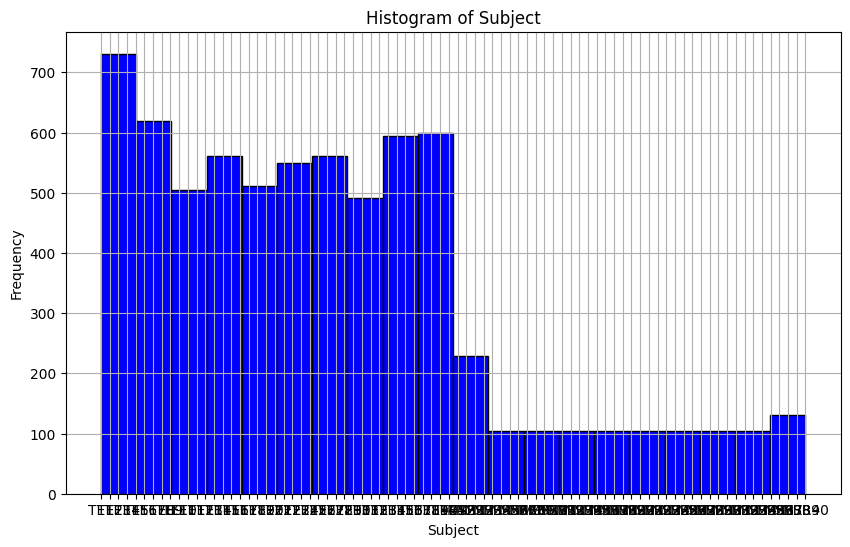

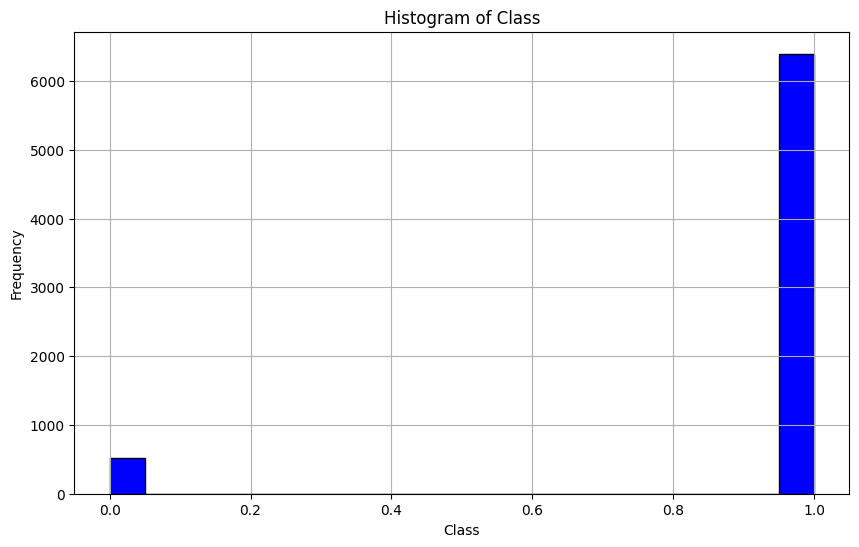

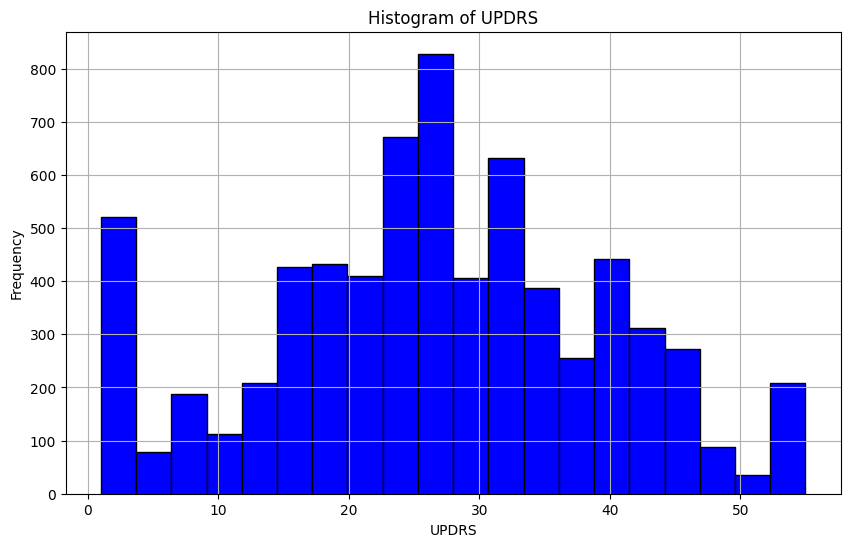

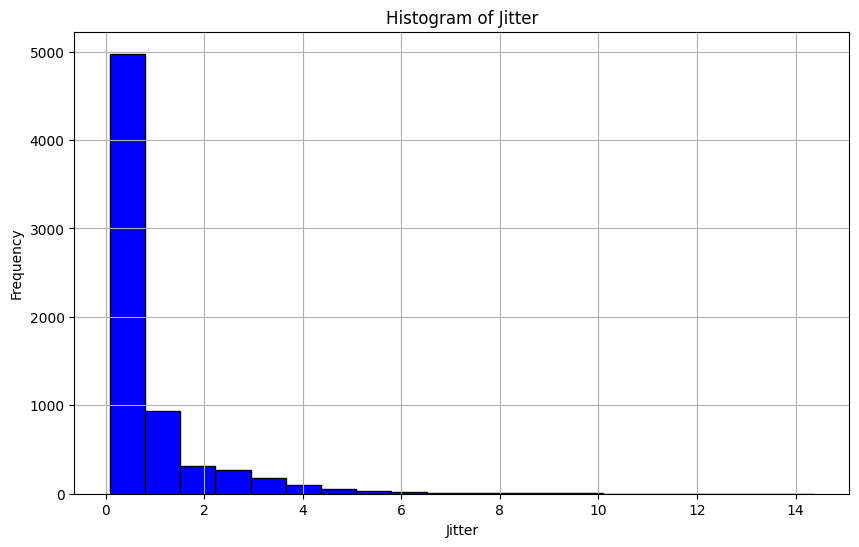

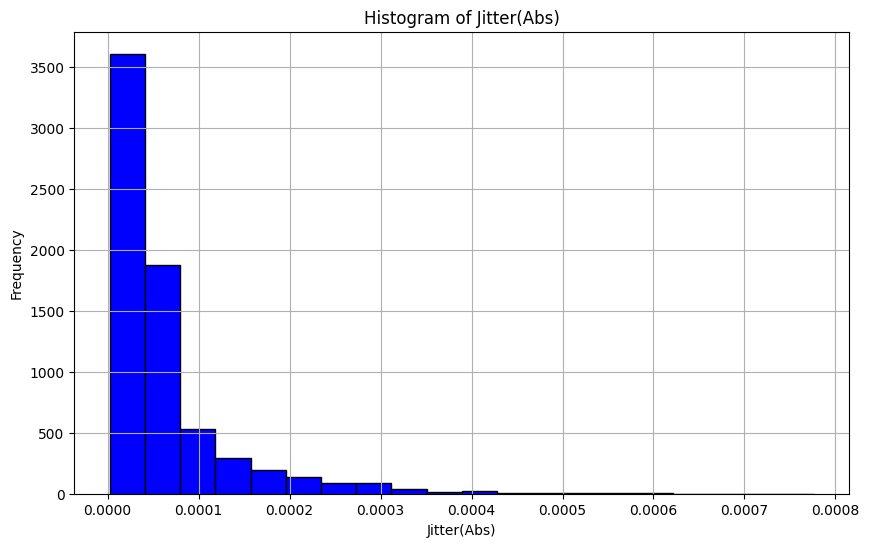

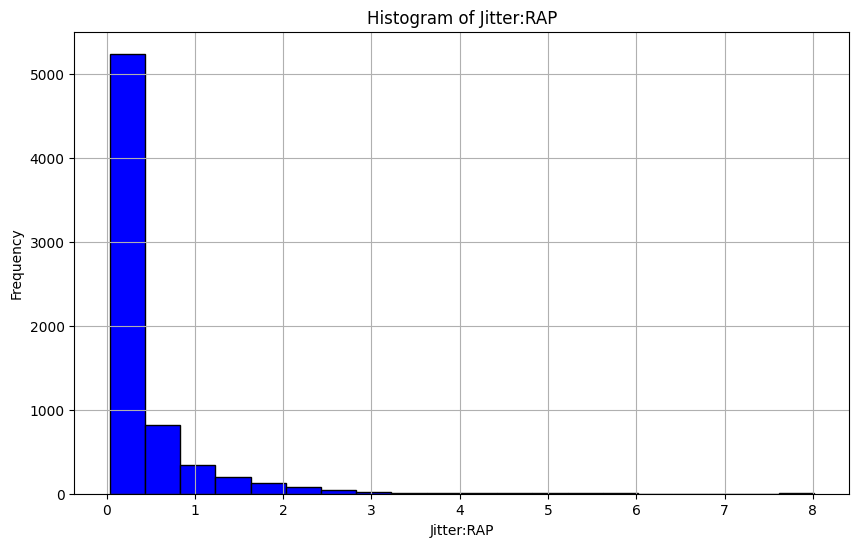

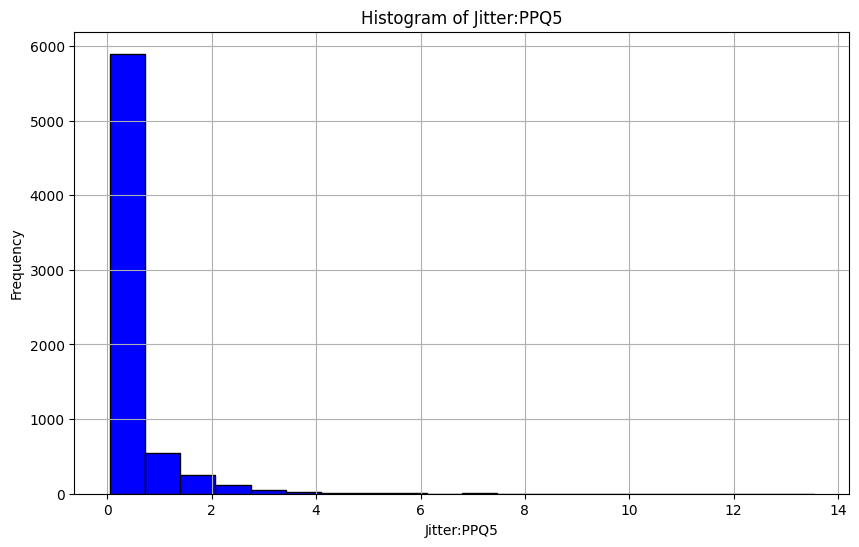

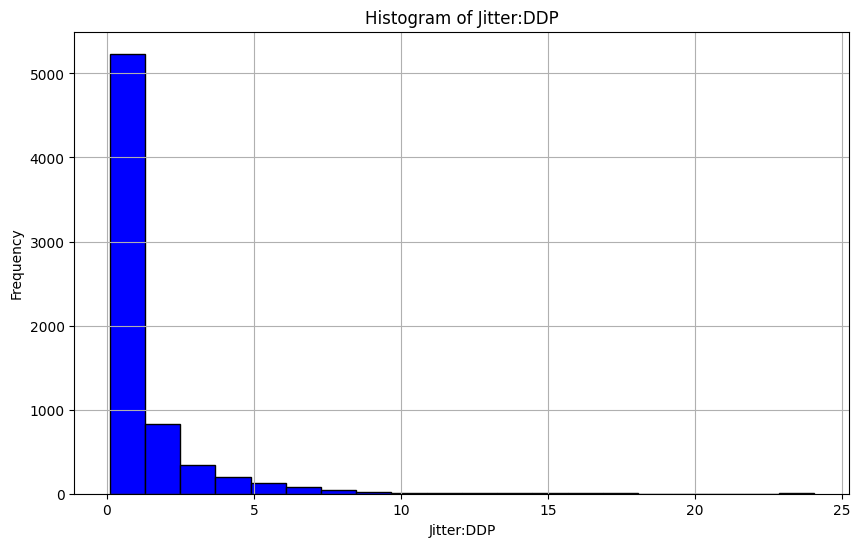

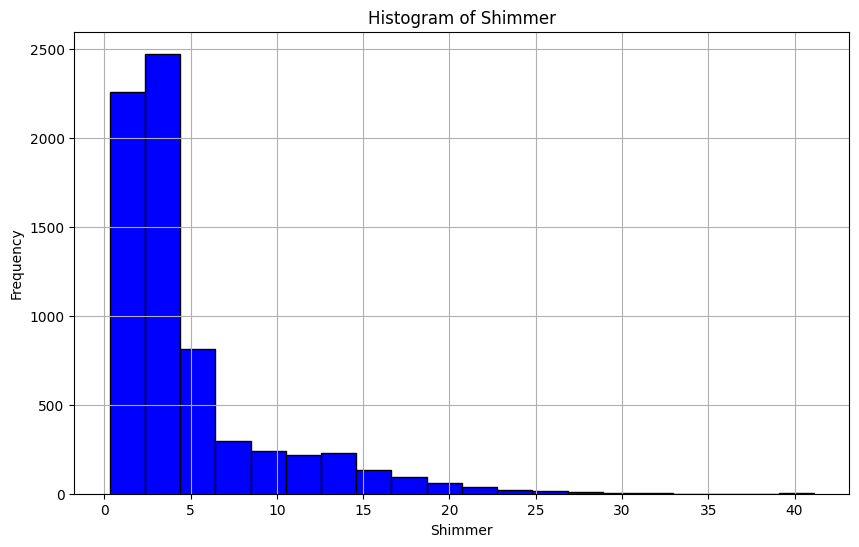

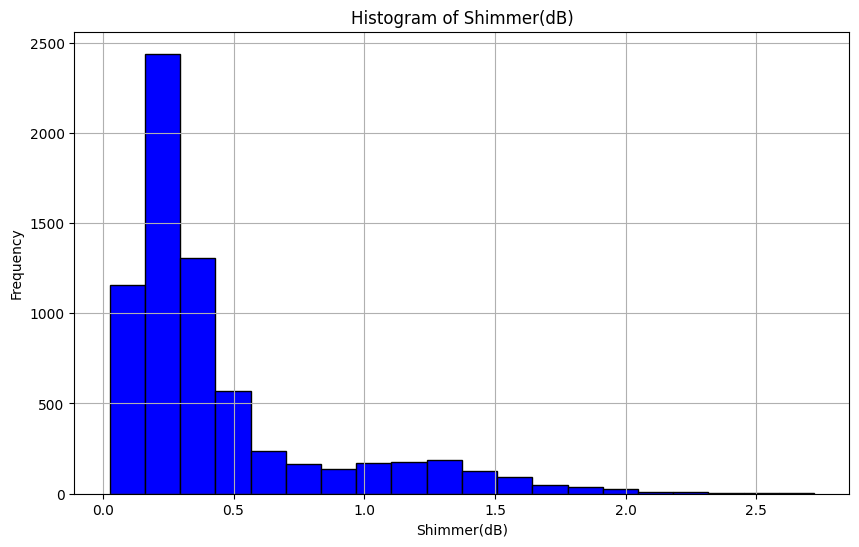

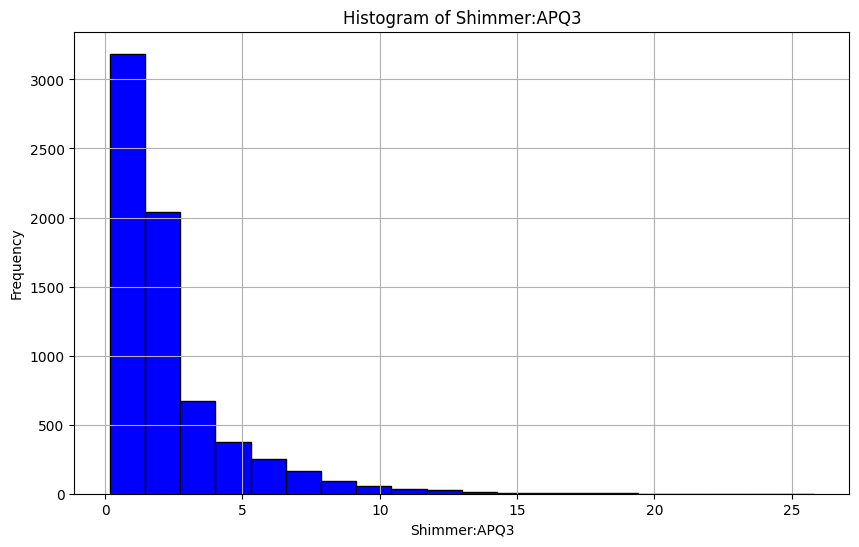

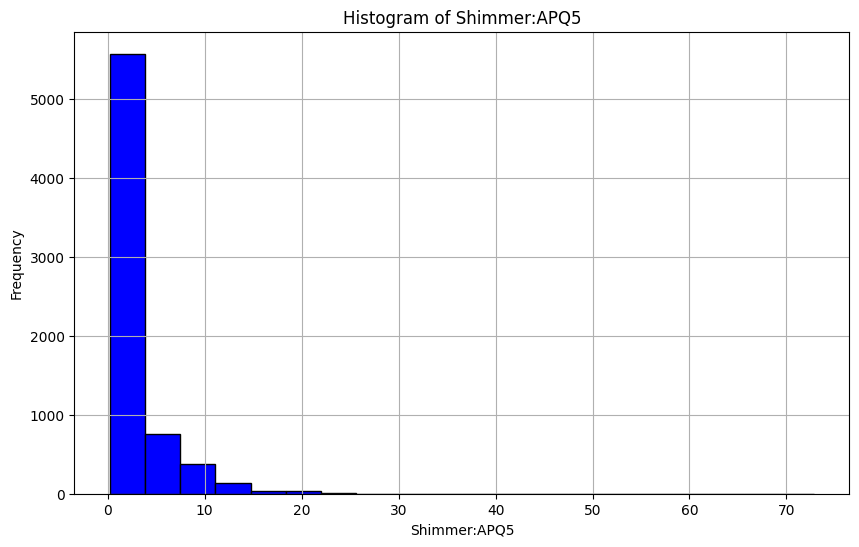

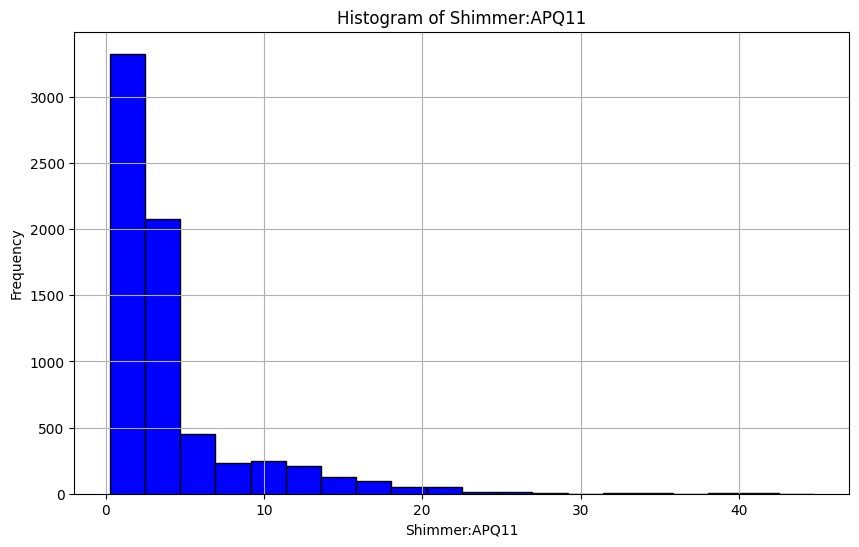

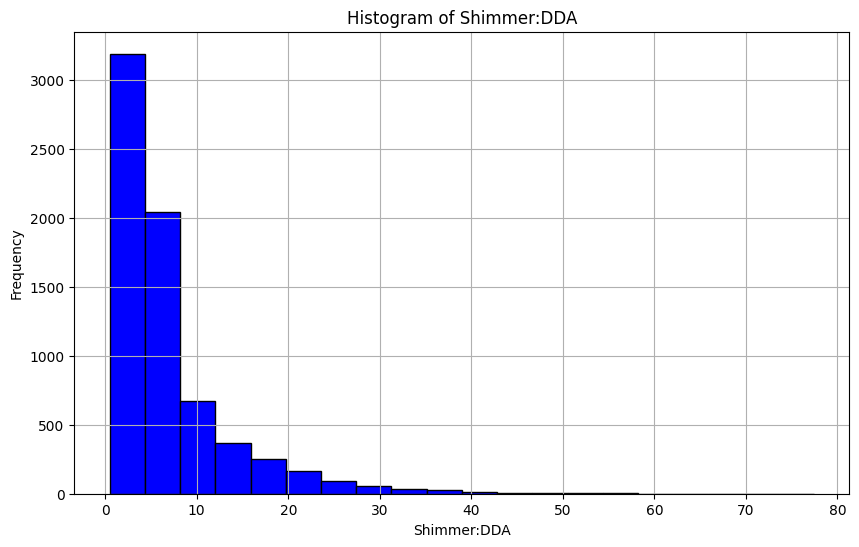

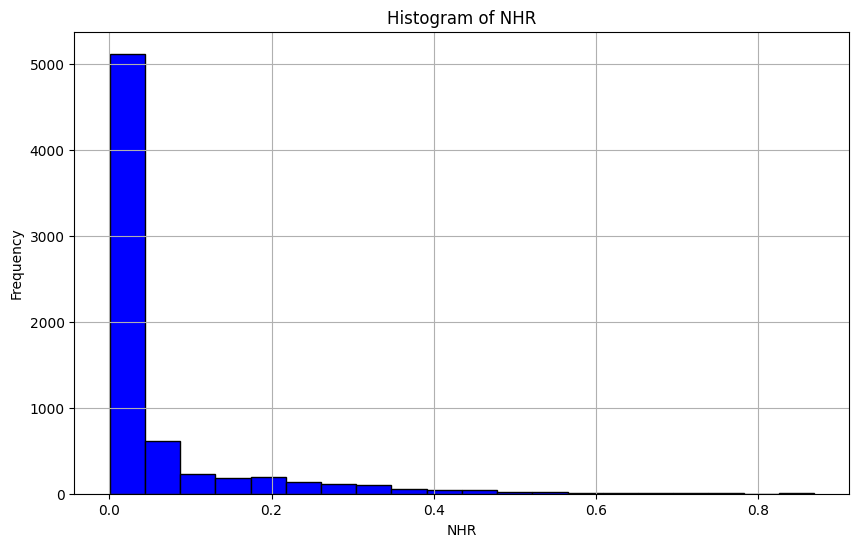

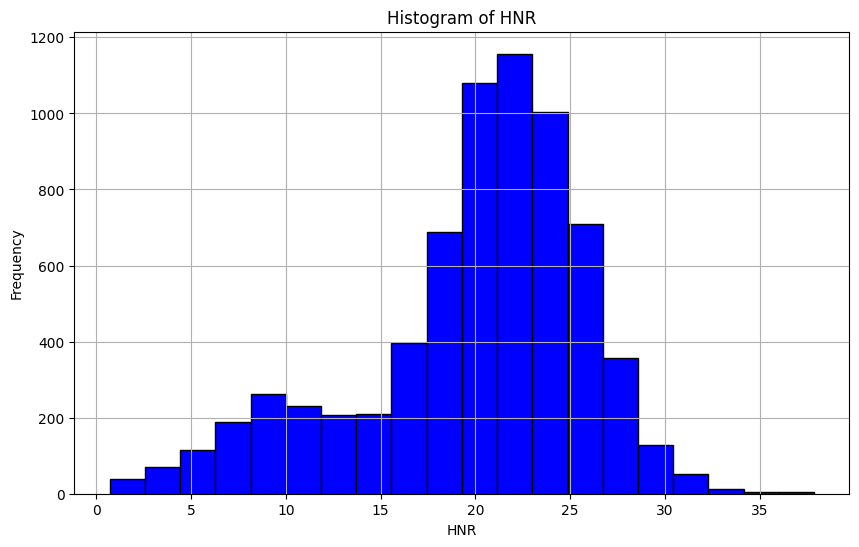

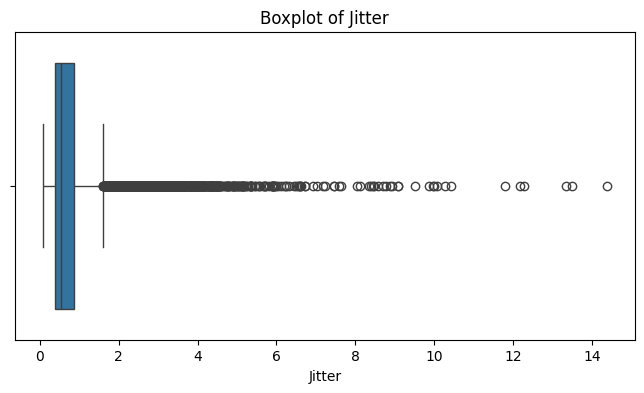

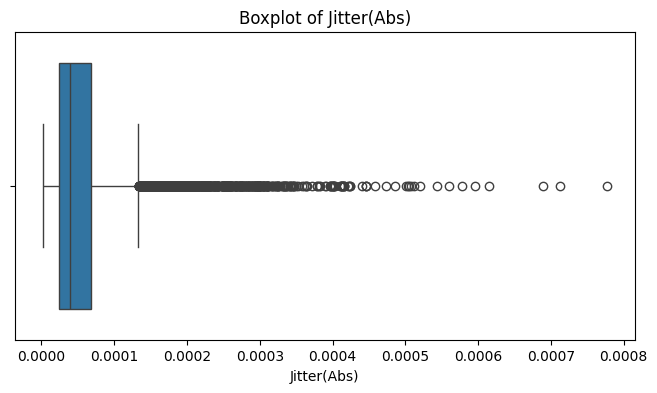

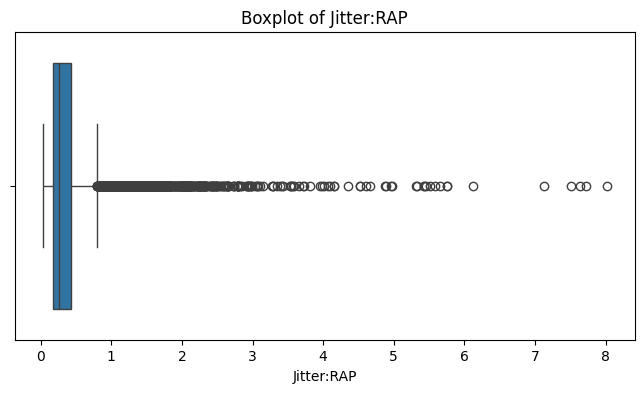

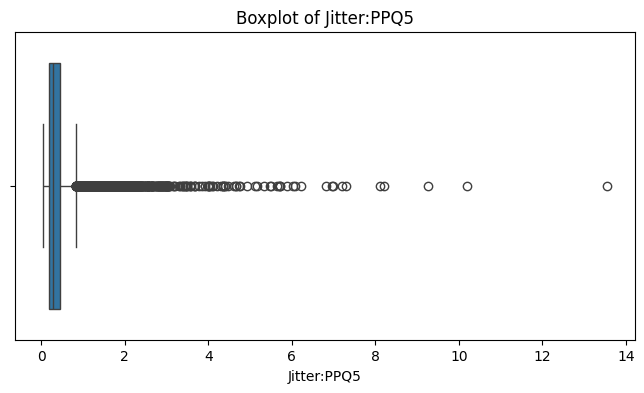

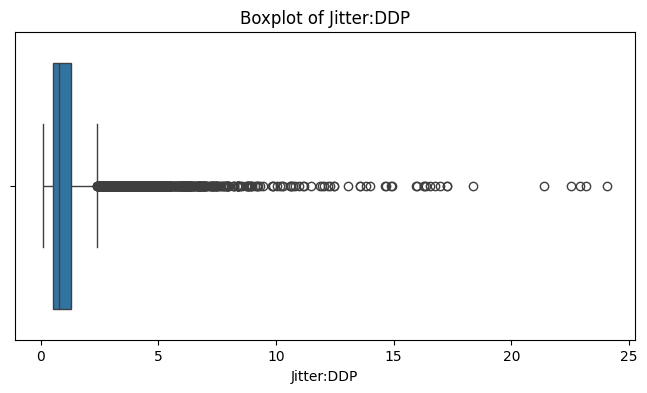

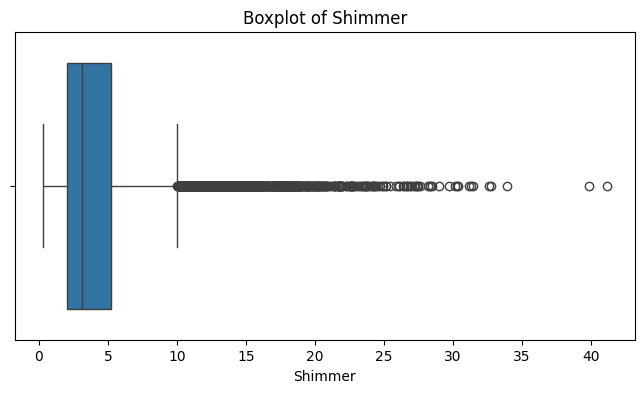

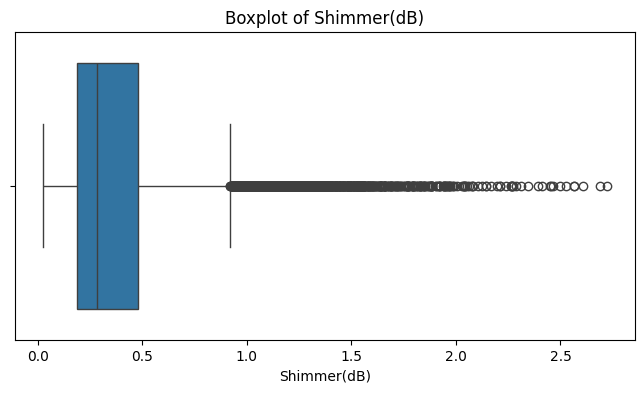

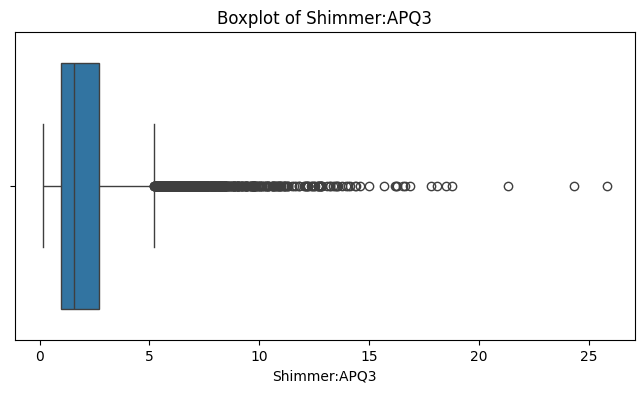

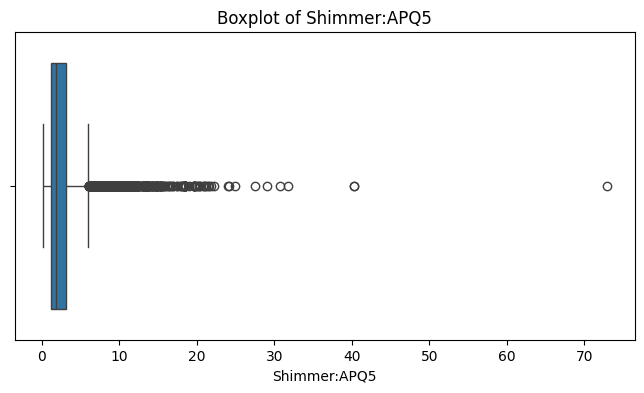

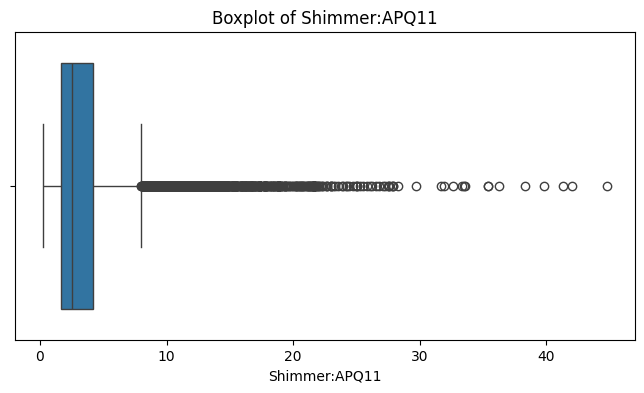

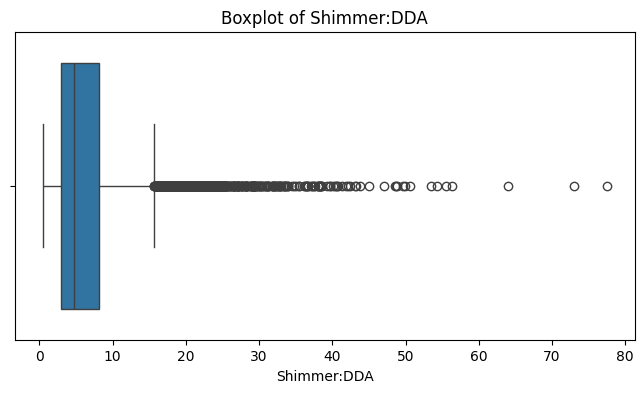

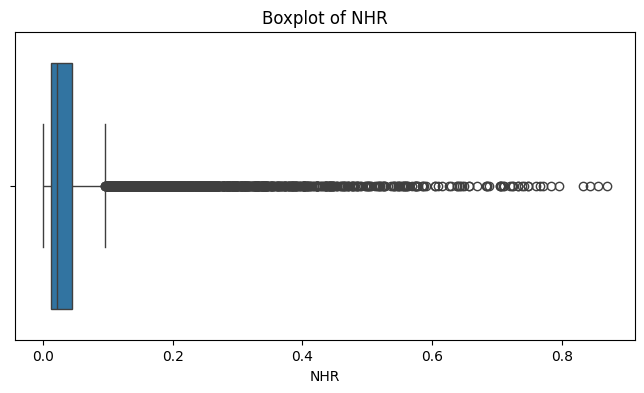

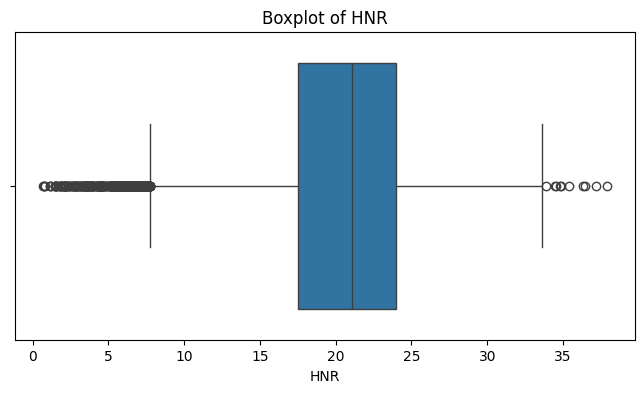

In [ ]:
import matplotlib.pyplot as plt

# Iterate over each column in the dataframe and plot each histogram separately
features = data.drop(columns=['Study', 'Subject', 'Class', 'UPDRS']).columns

for column in data.columns:
    plt.figure(figsize=(10, 6))  # Set size for individual plots
    data[column].hist(bins=20, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

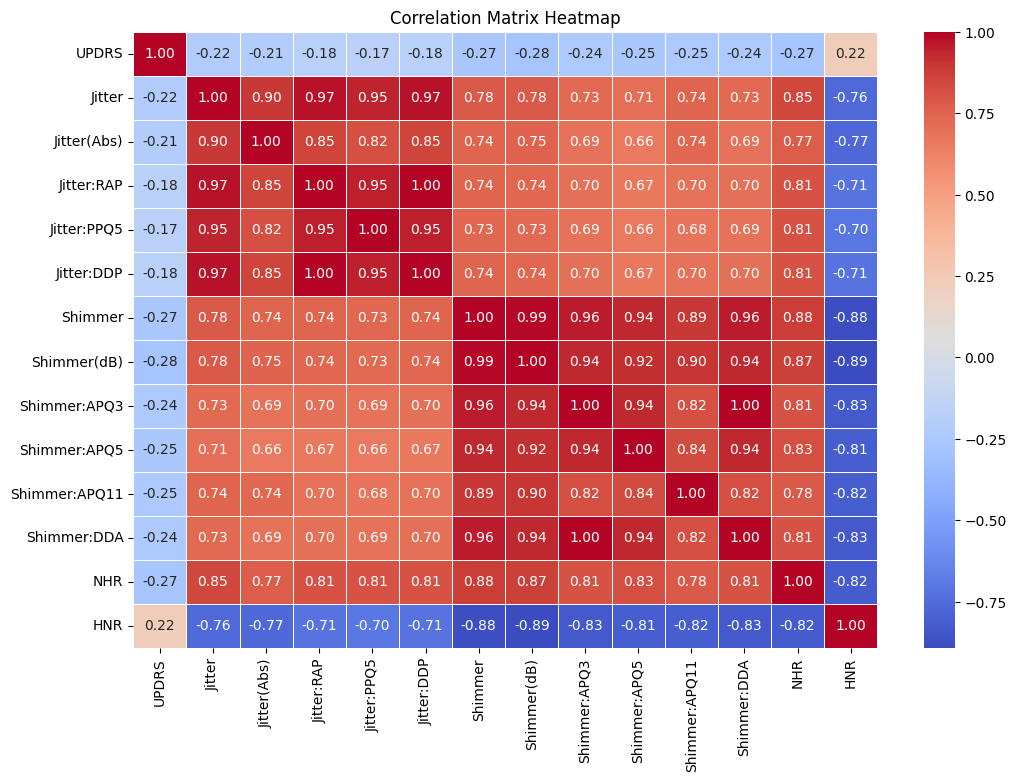

In [ ]:
# Correlation matrix
numeric_data = data.select_dtypes(include=['number']).drop(columns=['Class'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Data preprocessing
X = data.drop(columns=['Study', 'Subject', 'Class', 'UPDRS'])
y = data['Class']


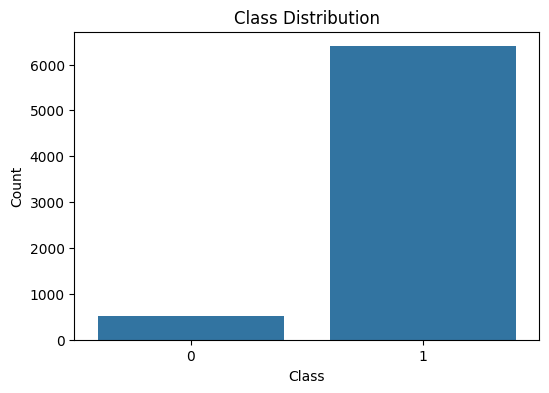

In [ ]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Model training with Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest model
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Performance metrics for Random Forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
classification_rep_rf = classification_report(y_test, y_test_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf * 100:.2f}%")
print("Random Forest Classification Report:\n", classification_rep_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)


Random Forest Training Accuracy: 95.52%
Random Forest Testing Accuracy: 94.11%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1919
           1       0.97      0.91      0.94      1918

    accuracy                           0.94      3837
   macro avg       0.94      0.94      0.94      3837
weighted avg       0.94      0.94      0.94      3837

Random Forest Confusion Matrix:
 [[1868   51]
 [ 175 1743]]


In [ ]:
# Model training with Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest model
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Performance metrics for Random Forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
classification_rep_rf = classification_report(y_test, y_test_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf * 100:.2f}%")
print("Random Forest Classification Report:\n", classification_rep_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)

# Train and evaluate SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate SVM model
y_train_pred_svm = svm_model.predict(X_train_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Performance metrics for SVM
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
classification_rep_svm = classification_report(y_test, y_test_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)

print(f"SVM Training Accuracy: {train_accuracy_svm * 100:.2f}%")
print(f"SVM Testing Accuracy: {test_accuracy_svm * 100:.2f}%")
print("SVM Classification Report:\n", classification_rep_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)


Random Forest Training Accuracy: 95.52%
Random Forest Testing Accuracy: 94.11%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1919
           1       0.97      0.91      0.94      1918

    accuracy                           0.94      3837
   macro avg       0.94      0.94      0.94      3837
weighted avg       0.94      0.94      0.94      3837

Random Forest Confusion Matrix:
 [[1868   51]
 [ 175 1743]]
SVM Training Accuracy: 90.98%
SVM Testing Accuracy: 91.50%
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1919
           1       0.93      0.90      0.91      1918

    accuracy                           0.92      3837
   macro avg       0.92      0.92      0.92      3837
weighted avg       0.92      0.92      0.92      3837

SVM Confusion Matrix:
 [[1782  137]
 [ 189 1729]]


In [ ]:
# Feature importance for Random Forest
feature_importances = rf_model.feature_importances_
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:\n", important_features)

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_resampled, y_resampled, cv=3, scoring='accuracy')
print(f"\nRandom Forest Cross-Validation Accuracy: {cv_scores_rf.mean() * 100:.2f}%")


Random Forest Feature Importances:
           Feature  Importance
6     Shimmer(dB)    0.273289
5         Shimmer    0.157082
9   Shimmer:APQ11    0.109708
12            HNR    0.093545
11            NHR    0.083153
0          Jitter    0.067344
8    Shimmer:APQ5    0.057411
10    Shimmer:DDA    0.038111
7    Shimmer:APQ3    0.033903
3     Jitter:PPQ5    0.024875
1     Jitter(Abs)    0.021107
4      Jitter:DDP    0.021020
2      Jitter:RAP    0.019450

Random Forest Cross-Validation Accuracy: 92.95%


In [ ]:
'''# Prediction on unseen data
example_input = {
    'Jitter': 0.620,
    'Jitter(Abs)': 0.00003000,
    'Jitter:RAP': 0.250,
    'Jitter:PPQ5': 0.22,
    'Jitter:DDP': 0.750,
    'Shimmer': 3.600,
    'Shimmer(dB)': 0.485,
    'Shimmer:APQ3': 1.70,
    'Shimmer:APQ5': 2.10,
    'Shimmer:APQ11': 3.100,
    'Shimmer:DDA': 5.200,
    'NHR': 0.052000,
    'HNR': 17.400
}'''

#No parkinsons
'''example_input = {
    'Jitter': 2.23476177175191,
    'Jitter(Abs)': 0.000143972616290218,
    'Jitter:RAP': 0.593249242890866,
    'Jitter:PPQ5': 0.666725784387469,
    'Jitter:DDP': 1.78074772867259,
    'Shimmer': 8.08939958922346,
    'Shimmer(dB)': 0.757343966457873,
    'Shimmer:APQ3': 4.02178132215262,
    'Shimmer:APQ5': 4.36643095881994,
    'Shimmer:APQ11': 3.08005971075641,
    'Shimmer:DDA': 12.0646952193439,
    'NHR': 0.280494751091208,
    'HNR': 6.76648018471071
}'''

#Parkinsons

example_input = {
    'Jitter':0.384031852827898,
    'Jitter(Abs)': 0.0000169479587256117,
    'Jitter:RAP': 0.179308658582382,
    'Jitter:PPQ5': 0.1707882458385,
    'Jitter:DDP': 0.538795872561177,
    'Shimmer': 1.83691969496166,
    'Shimmer(dB)': 0.160585464336867,
    'Shimmer:APQ3': 0.983325257964926,
    'Shimmer:APQ5': 1.11226020637194,
    'Shimmer:APQ11': 1.29245670708808,
    'Shimmer:DDA': 2.94991072230179,
    'NHR': 0.0138399551344081,
    'HNR': 25.0131556752283
}


# Prepare input for prediction
input_df = pd.DataFrame([example_input])
input_df = input_df[X.columns]
input_scaled = scaler.transform(input_df)

# Make predictions with both models
prediction_rf = rf_model.predict(input_scaled)
prediction_svm = svm_model.predict(input_scaled)

print("Random Forest Prediction:", "Parkinson's disease" if prediction_rf[0] == 1 else "No Parkinson's disease")
print("SVM Prediction:", "Parkinson's disease" if prediction_svm[0] == 1 else "No Parkinson's disease")

# Additional check for model performance on unseen data
'''if test_accuracy_rf < 0.90:
    print("Warning: Random Forest model may not be generalizing well. Consider tuning hyperparameters or using a different model.")
if test_accuracy_svm < 0.90:
    print("Warning: SVM model may not be generalizing well. Consider tuning hyperparameters or using a different model.")'''

# Save the trained models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Random Forest Prediction: Parkinson's disease
SVM Prediction: Parkinson's disease


['scaler.pkl']

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the saved models and scaler
rf_model = joblib.load('random_forest_model.pkl')
svm_model = joblib.load('svm_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the new dataset
file_path = '/content/drive/MyDrive/MINI PROJECT/shuffled_dataset.csv'  # Replace with actual dataset path if needed
new_data = pd.read_csv(file_path)

# Ensure the new data has the same feature columns as the original data used for training
X_new = new_data.drop(columns=['Class'])  # Drop the target column 'Class'
y_actual = new_data['Class']  # Actual labels

# Scale the features in the new dataset using the previously saved scaler
X_new_scaled = scaler.transform(X_new)

# Make predictions using both the saved Random Forest and SVM models
y_pred_rf = rf_model.predict(X_new_scaled)
y_pred_svm = svm_model.predict(X_new_scaled)

# Print actual vs predicted for both models for each instance
print("Actual vs Predicted for each instance:")
for i in range(len(y_actual)):
    rf_prediction = "Parkinson's disease" if y_pred_rf[i] == 1 else "No Parkinson's disease"
    svm_prediction = "Parkinson's disease" if y_pred_svm[i] == 1 else "No Parkinson's disease"

    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Random Forest Prediction: {rf_prediction}")
    print(f"  SVM Prediction: {svm_prediction}")
    print()

# Evaluate Random Forest model on the new data
print("\nRandom Forest Model Evaluation:")
accuracy_rf = accuracy_score(y_actual, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Random Forest Classification Report:\n", classification_report(y_actual, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_actual, y_pred_rf))

# Evaluate SVM model on the new data
print("\nSVM Model Evaluation:")
accuracy_svm = accuracy_score(y_actual, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print("SVM Classification Report:\n", classification_report(y_actual, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_actual, y_pred_svm))


Actual vs Predicted for each instance:
Instance 1:
  Actual: 0
  Random Forest Prediction: No Parkinson's disease
  SVM Prediction: No Parkinson's disease

Instance 2:
  Actual: 0
  Random Forest Prediction: No Parkinson's disease
  SVM Prediction: No Parkinson's disease

Instance 3:
  Actual: 1
  Random Forest Prediction: Parkinson's disease
  SVM Prediction: Parkinson's disease

Instance 4:
  Actual: 1
  Random Forest Prediction: Parkinson's disease
  SVM Prediction: Parkinson's disease

Instance 5:
  Actual: 0
  Random Forest Prediction: No Parkinson's disease
  SVM Prediction: No Parkinson's disease

Instance 6:
  Actual: 1
  Random Forest Prediction: Parkinson's disease
  SVM Prediction: Parkinson's disease

Instance 7:
  Actual: 1
  Random Forest Prediction: Parkinson's disease
  SVM Prediction: Parkinson's disease

Instance 8:
  Actual: 1
  Random Forest Prediction: Parkinson's disease
  SVM Prediction: No Parkinson's disease

Instance 9:
  Actual: 0
  Random Forest Prediction: 

In [ ]:
import pandas as pd

# Load your dataset
file_path = '/content/drive/MyDrive/MINI PROJECT/new_synthetic_dataset1.csv'  # Replace with actual dataset path if needed
data = pd.read_csv(file_path)

# Shuffle the dataset
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled dataset to a new CSV file (optional)
shuffled_data.to_csv('/content/drive/MyDrive/MINI PROJECT/shuffled_dataset.csv', index=False)

# Display the first few rows of the shuffled dataset
print(shuffled_data.head())


     Jitter  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP    Shimmer  \
0  2.547490     0.000220    1.015714     1.567288    3.047676  15.434560   
1  2.493928     0.000124    1.183022     1.486526    3.549131  11.742152   
2  0.335540     0.000015    0.188686     0.179247    0.565057   1.709507   
3  0.736491     0.000044    0.320465     0.354000    0.961566   2.654263   
4  1.955760     0.000148    0.823023     0.760657    2.469084  11.115454   

   Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
0     1.343077      8.162642     10.182356       6.679012    24.488925   
1     1.271662      5.292988      7.843263      13.173912    15.878965   
2     0.151551      0.977551      1.032619       1.163530     2.931652   
3     0.237139      1.391231      1.440616       2.169569     4.173694   
4     0.961571      4.323908      7.349857      14.472562    12.970741   

        NHR        HNR  Class  
0  0.297372   7.290552      0  
1  0.255284   8.504720      0  
2 

In [ ]:
# Separate correct and incorrect predictions for Random Forest
print("\nCorrect and Incorrect Predictions - Random Forest:")
correct_rf = []
incorrect_rf = []

for i in range(len(y_actual)):
    if y_actual.iloc[i] == y_pred_rf[i]:
        correct_rf.append(i)
    else:
        incorrect_rf.append(i)

# Display correct predictions
print("\nCorrect Predictions for Random Forest:")
for i in correct_rf:
    rf_prediction = "Parkinson's disease" if y_pred_rf[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {rf_prediction}")
    print()

# Display incorrect predictions
print("\nIncorrect Predictions for Random Forest:")
for i in incorrect_rf:
    rf_prediction = "Parkinson's disease" if y_pred_rf[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {rf_prediction}")
    print()

# Separate correct and incorrect predictions for SVM
print("\nCorrect and Incorrect Predictions - SVM:")
correct_svm = []
incorrect_svm = []

for i in range(len(y_actual)):
    if y_actual.iloc[i] == y_pred_svm[i]:
        correct_svm.append(i)
    else:
        incorrect_svm.append(i)

# Display correct predictions
print("\nCorrect Predictions for SVM:")
for i in correct_svm:
    svm_prediction = "Parkinson's disease" if y_pred_svm[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {svm_prediction}")
    print()

# Display incorrect predictions
print("\nIncorrect Predictions for SVM:")
for i in incorrect_svm:
    svm_prediction = "Parkinson's disease" if y_pred_svm[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {svm_prediction}")
    print()



Correct and Incorrect Predictions - Random Forest:

Correct Predictions for Random Forest:
Instance 1:
  Actual: 0
  Prediction: No Parkinson's disease

Instance 2:
  Actual: 0
  Prediction: No Parkinson's disease

Instance 3:
  Actual: 1
  Prediction: Parkinson's disease

Instance 4:
  Actual: 1
  Prediction: Parkinson's disease

Instance 5:
  Actual: 0
  Prediction: No Parkinson's disease

Instance 6:
  Actual: 1
  Prediction: Parkinson's disease

Instance 7:
  Actual: 1
  Prediction: Parkinson's disease

Instance 8:
  Actual: 1
  Prediction: Parkinson's disease

Instance 9:
  Actual: 0
  Prediction: No Parkinson's disease

Instance 10:
  Actual: 1
  Prediction: Parkinson's disease

Instance 11:
  Actual: 1
  Prediction: Parkinson's disease

Instance 12:
  Actual: 1
  Prediction: Parkinson's disease

Instance 13:
  Actual: 1
  Prediction: Parkinson's disease

Instance 14:
  Actual: 0
  Prediction: No Parkinson's disease

Instance 15:
  Actual: 1
  Prediction: Parkinson's disease

In

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the saved models and scaler
rf_model = joblib.load('random_forest_model.pkl')
svm_model = joblib.load('svm_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the dataset you uploaded
file_path = '/content/drive/MyDrive/MINI PROJECT/TE_MSRtrain_combined (1).csv'  # Path to the uploaded file
new_data = pd.read_csv(file_path)

# Remove columns that were not part of the original training dataset
# Adjust the list ['Study', 'Subject', 'UPDRS'] to match the column names in your dataset
X_new = new_data.drop(columns=['Class', 'Study', 'Subject', 'UPDRS'])  # Drop target and unrelated columns
y_actual = new_data['Class']  # Actual labels

# Scale the features in the new dataset using the previously saved scaler
X_new_scaled = scaler.transform(X_new)

# Make predictions using both the saved Random Forest and SVM models
y_pred_rf = rf_model.predict(X_new_scaled)
y_pred_svm = svm_model.predict(X_new_scaled)

# Evaluate Random Forest model on the new data
print("\nRandom Forest Model Evaluation:")
accuracy_rf = accuracy_score(y_actual, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Random Forest Classification Report:\n", classification_report(y_actual, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_actual, y_pred_rf))

# Evaluate SVM model on the new data
print("\nSVM Model Evaluation:")
accuracy_svm = accuracy_score(y_actual, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print("SVM Classification Report:\n", classification_report(y_actual, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_actual, y_pred_svm))

# Separate correct and incorrect predictions for both models
print("\nCorrect and Incorrect Predictions - Random Forest and SVM:")

correct_rf = []
incorrect_rf = []
correct_svm = []
incorrect_svm = []

for i in range(len(y_actual)):
    if y_actual.iloc[i] == y_pred_rf[i]:
        correct_rf.append(i)
    else:
        incorrect_rf.append(i)

    if y_actual.iloc[i] == y_pred_svm[i]:
        correct_svm.append(i)
    else:
        incorrect_svm.append(i)

# Display correct predictions for Random Forest
print("\nCorrect Predictions for Random Forest:")
for i in correct_rf:
    rf_prediction = "Parkinson's disease" if y_pred_rf[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {rf_prediction}")
    print()

# Display incorrect predictions for Random Forest
print("\nIncorrect Predictions for Random Forest:")
for i in incorrect_rf:
    rf_prediction = "Parkinson's disease" if y_pred_rf[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {rf_prediction}")
    print()

# Display correct predictions for SVM
print("\nCorrect Predictions for SVM:")
for i in correct_svm:
    svm_prediction = "Parkinson's disease" if y_pred_svm[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {svm_prediction}")
    print()

# Display incorrect predictions for SVM
print("\nIncorrect Predictions for SVM:")
for i in incorrect_svm:
    svm_prediction = "Parkinson's disease" if y_pred_svm[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {svm_prediction}")
    print()


Streaming output truncated to the last 5000 lines.
  Prediction: Parkinson's disease

Instance 6034:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6058:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6059:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6084:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6085:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6086:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6114:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6120:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6127:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6136:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6137:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6138:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6154:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6167:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6171:
  Actual: 1
  Prediction: Parki

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the saved models and scaler
rf_model = joblib.load('random_forest_model.pkl')
svm_model = joblib.load('svm_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the dataset you uploaded
file_path = '/content/drive/MyDrive/MINI PROJECT/TE_MSRtrain_combined (1).csv'  # Path to the uploaded file
new_data = pd.read_csv(file_path)

# Remove columns that were not part of the original training dataset
# Adjust the list ['Study', 'Subject', 'UPDRS'] to match the column names in your dataset
X_new = new_data.drop(columns=['Class', 'Study', 'Subject', 'UPDRS'])  # Drop target and unrelated columns
y_actual = new_data['Class']  # Actual labels

# Scale the features in the new dataset using the previously saved scaler
X_new_scaled = scaler.transform(X_new)

# Make predictions using both the saved Random Forest and SVM models
y_pred_rf = rf_model.predict(X_new_scaled)
y_pred_svm = svm_model.predict(X_new_scaled)

# Evaluate Random Forest model on the new data
print("\nRandom Forest Model Evaluation:")
accuracy_rf = accuracy_score(y_actual, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Random Forest Classification Report:\n", classification_report(y_actual, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_actual, y_pred_rf))

# Evaluate SVM model on the new data
print("\nSVM Model Evaluation:")
accuracy_svm = accuracy_score(y_actual, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print("SVM Classification Report:\n", classification_report(y_actual, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_actual, y_pred_svm))

# Separate correct and incorrect predictions for both models and count them
print("\nCorrect and Incorrect Predictions - Random Forest and SVM:")

correct_rf = []
incorrect_rf = []
correct_svm = []
incorrect_svm = []

for i in range(len(y_actual)):
    if y_actual.iloc[i] == y_pred_rf[i]:
        correct_rf.append(i)
    else:
        incorrect_rf.append(i)

    if y_actual.iloc[i] == y_pred_svm[i]:
        correct_svm.append(i)
    else:
        incorrect_svm.append(i)

# Count of correct and incorrect predictions for Random Forest
correct_rf_count = len(correct_rf)
incorrect_rf_count = len(incorrect_rf)
print(f"\nRandom Forest: Correct Predictions = {correct_rf_count}, Incorrect Predictions = {incorrect_rf_count}")

# Count of correct and incorrect predictions for SVM
correct_svm_count = len(correct_svm)
incorrect_svm_count = len(incorrect_svm)
print(f"\nSVM: Correct Predictions = {correct_svm_count}, Incorrect Predictions = {incorrect_svm_count}")

# Display correct predictions for Random Forest
print("\nCorrect Predictions for Random Forest:")
for i in correct_rf:
    rf_prediction = "Parkinson's disease" if y_pred_rf[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {rf_prediction}")
    print()

# Display incorrect predictions for Random Forest
print("\nIncorrect Predictions for Random Forest:")
for i in incorrect_rf:
    rf_prediction = "Parkinson's disease" if y_pred_rf[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {rf_prediction}")
    print()

# Display correct predictions for SVM
print("\nCorrect Predictions for SVM:")
for i in correct_svm:
    svm_prediction = "Parkinson's disease" if y_pred_svm[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {svm_prediction}")
    print()

# Display incorrect predictions for SVM
print("\nIncorrect Predictions for SVM:")
for i in incorrect_svm:
    svm_prediction = "Parkinson's disease" if y_pred_svm[i] == 1 else "No Parkinson's disease"
    print(f"Instance {i + 1}:")
    print(f"  Actual: {y_actual.iloc[i]}")
    print(f"  Prediction: {svm_prediction}")
    print()


Streaming output truncated to the last 5000 lines.
  Prediction: Parkinson's disease

Instance 6034:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6058:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6059:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6084:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6085:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6086:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6114:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6120:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6127:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6136:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6137:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6138:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6154:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6167:
  Actual: 1
  Prediction: Parkinson's disease

Instance 6171:
  Actual: 1
  Prediction: Parki

In [ ]:
print(f"\nRandom Forest: Correct Predictions = {correct_rf_count}, Incorrect Predictions = {incorrect_rf_count}")



Random Forest: Correct Predictions = 6366, Incorrect Predictions = 549


In [ ]:
print(f"\nSVM: Correct Predictions = {correct_svm_count}, Incorrect Predictions = {incorrect_svm_count}")



SVM: Correct Predictions = 6189, Incorrect Predictions = 726


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/content/drive/MyDrive/MINI PROJECT/TE_MSRtrain_combined (1).csv'
data = pd.read_csv(file_path)

# Data preprocessing
X = data.drop(columns=['Study', 'Subject', 'Class', 'UPDRS'])
y = data['Class']

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Randomized Search for Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=5,  # Number of random parameter combinations to try
    cv=2,  # Reduce cross-validation folds to speed up
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search_rf.fit(X_train_scaled, y_train)

# Best Random Forest model
best_rf_model = random_search_rf.best_estimator_

# Evaluate Random Forest model
y_train_pred_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_rf = best_rf_model.predict(X_test_scaled)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf * 100:.2f}%")

# Parameter grid for SVM
param_grid_svm = {
    'C': [1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# Randomized Search for SVM
svm_model = SVC(class_weight='balanced', random_state=42)
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_grid_svm,
    n_iter=5,  # Limit the number of random parameter combinations to try
    cv=2,  # Reduce cross-validation folds
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search_svm.fit(X_train_scaled, y_train)

# Best SVM model
best_svm_model = random_search_svm.best_estimator_

# Evaluate SVM model
y_train_pred_svm = best_svm_model.predict(X_train_scaled)
y_test_pred_svm = best_svm_model.predict(X_test_scaled)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Training Accuracy: {train_accuracy_svm * 100:.2f}%")
print(f"SVM Testing Accuracy: {test_accuracy_svm * 100:.2f}%")

# Example Input for Prediction (Parkinson's)
example_input = {
    'Jitter': 0.384031852827898,
    'Jitter(Abs)': 0.0000169479587256117,
    'Jitter:RAP': 0.179308658582382,
    'Jitter:PPQ5': 0.1707882458385,
    'Jitter:DDP': 0.538795872561177,
    'Shimmer': 1.83691969496166,
    'Shimmer(dB)': 0.160585464336867,
    'Shimmer:APQ3': 0.983325257964926,
    'Shimmer:APQ5': 1.11226020637194,
    'Shimmer:APQ11': 1.29245670708808,
    'Shimmer:DDA': 2.94991072230179,
    'NHR': 0.0138399551344081,
    'HNR': 25.0131556752283
}

# Prepare input for prediction
input_df = pd.DataFrame([example_input])
input_df = input_df[X.columns]
input_scaled = scaler.transform(input_df)

# Make predictions with both models
prediction_rf = best_rf_model.predict(input_scaled)
prediction_svm = best_svm_model.predict(input_scaled)

print("Random Forest Prediction:", "Parkinson's disease" if prediction_rf[0] == 1 else "No Parkinson's disease")
print("SVM Prediction:", "Parkinson's disease" if prediction_svm[0] == 1 else "No Parkinson's disease")

# Save the trained models
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
joblib.dump(best_svm_model, 'best_svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Random Forest Training Accuracy: 97.13%
Random Forest Testing Accuracy: 94.76%
Fitting 2 folds for each of 4 candidates, totalling 8 fits
SVM Training Accuracy: 92.73%
SVM Testing Accuracy: 92.99%
Random Forest Prediction: Parkinson's disease
SVM Prediction: Parkinson's disease


['scaler.pkl']

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest Training Accuracy: 97.61%
Random Forest Testing Accuracy: 95.20%
Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM Training Accuracy: 94.55%
SVM Testing Accuracy: 93.26%
Voting Classifier Testing Accuracy: 94.36%


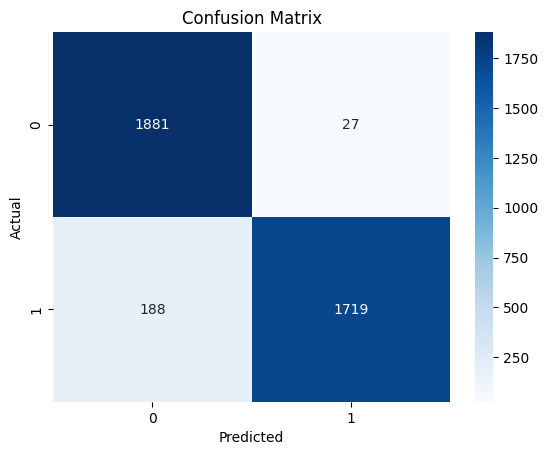

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1908
           1       0.98      0.90      0.94      1907

    accuracy                           0.94      3815
   macro avg       0.95      0.94      0.94      3815
weighted avg       0.95      0.94      0.94      3815

Voting Classifier Prediction: Parkinson's disease


['scaler.pkl']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
import joblib
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/content/drive/MyDrive/MINI PROJECT/TE_MSRtrain_combined (1).csv'
data = pd.read_csv(file_path)

# Data preprocessing
X = data.drop(columns=['Study', 'Subject', 'Class', 'UPDRS'])
y = data['Class']

# Handle class imbalance with SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smotetomek.fit_resample(X, y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Feature scaling using RobustScaler (better handling of outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

# Randomized Search for Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=10,  # Increase iterations to try more parameter combinations
    cv=5,  # Increase cross-validation folds for better generalization
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search_rf.fit(X_train_scaled, y_train)

# Best Random Forest model
best_rf_model = random_search_rf.best_estimator_

# Evaluate Random Forest model
y_train_pred_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_rf = best_rf_model.predict(X_test_scaled)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf * 100:.2f}%")

# Parameter grid for SVM
param_grid_svm = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly']
}

# Randomized Search for SVM
svm_model = SVC(class_weight='balanced', random_state=42)
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_grid_svm,
    n_iter=10,  # Increase iterations for better parameter exploration
    cv=5,  # Increase cross-validation folds
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search_svm.fit(X_train_scaled, y_train)

# Best SVM model
best_svm_model = random_search_svm.best_estimator_

# Evaluate SVM model
y_train_pred_svm = best_svm_model.predict(X_train_scaled)
y_test_pred_svm = best_svm_model.predict(X_test_scaled)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Training Accuracy: {train_accuracy_svm * 100:.2f}%")
print(f"SVM Testing Accuracy: {test_accuracy_svm * 100:.2f}%")

# Ensemble with Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('svm', best_svm_model)
], voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the Voting Classifier on the test set
y_test_pred_voting = voting_clf.predict(X_test_scaled)
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)
print(f"Voting Classifier Testing Accuracy: {test_accuracy_voting * 100:.2f}%")

# Confusion Matrix and Classification Report for Voting Classifier
conf_matrix = confusion_matrix(y_test, y_test_pred_voting)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

classification_rep = classification_report(y_test, y_test_pred_voting)
print(classification_rep)

# Example Input for Prediction (Parkinson's)
example_input = {
    'Jitter': 0.384031852827898,
    'Jitter(Abs)': 0.0000169479587256117,
    'Jitter:RAP': 0.179308658582382,
    'Jitter:PPQ5': 0.1707882458385,
    'Jitter:DDP': 0.538795872561177,
    'Shimmer': 1.83691969496166,
    'Shimmer(dB)': 0.160585464336867,
    'Shimmer:APQ3': 0.983325257964926,
    'Shimmer:APQ5': 1.11226020637194,
    'Shimmer:APQ11': 1.29245670708808,
    'Shimmer:DDA': 2.94991072230179,
    'NHR': 0.0138399551344081,
    'HNR': 25.0131556752283
}

# Prepare input for prediction
input_df = pd.DataFrame([example_input])
input_df = input_df[X.columns]  # Align with feature columns
input_scaled = scaler.transform(input_df)

# Make predictions with the Voting Classifier
prediction_voting = voting_clf.predict(input_scaled)

print("Voting Classifier Prediction:", "Parkinson's disease" if prediction_voting[0] == 1 else "No Parkinson's disease")

# Save the trained models and scaler
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
joblib.dump(best_svm_model, 'best_svm_model.pkl')
joblib.dump(voting_clf, 'voting_classifier_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


In [ ]:
print(f"Random Forest - Correct Predictions: {correct_rf}, Incorrect Predictions: {incorrect_rf}")
print(f"SVM - Correct Predictions: {correct_svm}, Incorrect Predictions: {incorrect_svm}")



Random Forest - Correct Predictions: 30, Incorrect Predictions: 30
SVM - Correct Predictions: 30, Incorrect Predictions: 30


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the saved models and scaler
best_rf_model = joblib.load('best_random_forest_model.pkl')
best_svm_model = joblib.load('best_svm_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the new dataset
new_data = pd.read_csv('/content/drive/MyDrive/MINI PROJECT/shuffled_dataset.csv')

# Prepare the dataset for testing
X_new = new_data.drop(columns=['Class'])  # Features
y_new = new_data['Class']  # Target

# Scale the new dataset using the previously fitted scaler
X_new_scaled = scaler.transform(X_new)

# Make predictions using the loaded Random Forest and SVM models
y_pred_rf = best_rf_model.predict(X_new_scaled)
y_pred_svm = best_svm_model.predict(X_new_scaled)

# Print the actual and predicted values for Random Forest
print("Random Forest Results:")
correct_rf, incorrect_rf = 0, 0
for actual, predicted in zip(y_new, y_pred_rf):
    print(f"Actual: {actual}, Predicted: {predicted}")
    if actual == predicted:
        correct_rf += 1
    else:
        incorrect_rf += 1
print(f"Random Forest - Correct Predictions: {correct_rf}, Incorrect Predictions: {incorrect_rf}")

# Print the actual and predicted values for SVM
print("\nSVM Results:")
correct_svm, incorrect_svm = 0, 0
for actual, predicted in zip(y_new, y_pred_svm):
    print(f"Actual: {actual}, Predicted: {predicted}")
    if actual == predicted:
        correct_svm += 1
    else:
        incorrect_svm += 1
print(f"SVM - Correct Predictions: {correct_svm}, Incorrect Predictions: {incorrect_svm}")

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_new, y_pred_rf)
print(f"\nRandom Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_new, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_new, y_pred_rf))

# Evaluate SVM
svm_accuracy = accuracy_score(y_new, y_pred_svm)
print(f"\nSVM Accuracy: {svm_accuracy * 100:.2f}%")
print("SVM Confusion Matrix:")
print(confusion_matrix(y_new, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_new, y_pred_svm))


Random Forest Results:
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predic

In [ ]:
print(f"Random Forest - Correct Predictions: {correct_rf}, Incorrect Predictions: {incorrect_rf}")


Random Forest - Correct Predictions: 57, Incorrect Predictions: 3


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Random Forest Training Accuracy: 97.04%
Random Forest Testing Accuracy: 94.57%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
SVM Training Accuracy: 93.25%
SVM Testing Accuracy: 92.08%
Voting Classifier Testing Accuracy: 93.68%


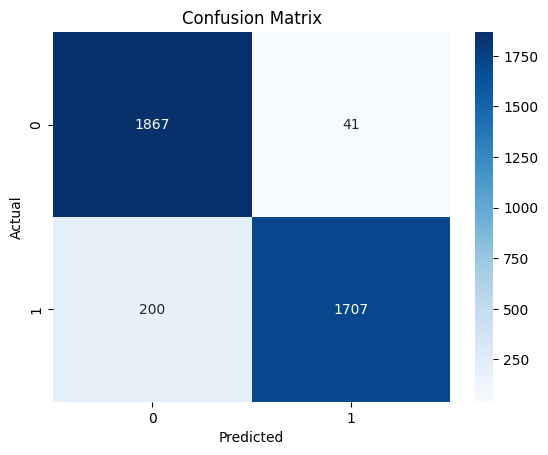

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1908
           1       0.98      0.90      0.93      1907

    accuracy                           0.94      3815
   macro avg       0.94      0.94      0.94      3815
weighted avg       0.94      0.94      0.94      3815

Voting Classifier Prediction: Parkinson's disease


['scaler.pkl']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
import joblib
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/content/drive/MyDrive/MINI PROJECT/TE_MSRtrain_combined (1).csv'
data = pd.read_csv(file_path)

# Data preprocessing
X = data.drop(columns=['Study', 'Subject', 'Class', 'UPDRS'])
y = data['Class']

# Handle class imbalance with SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smotetomek.fit_resample(X, y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Feature scaling using RobustScaler (better handling of outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for Random Forest (reduced grid for speed)
param_grid_rf = {
    'n_estimators': [100],  # Reduce number of estimators
    'max_depth': [10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2]
}

# Randomized Search for Random Forest (reduced iterations and cross-validation)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=5,  # Reduce iterations
    cv=3,  # Reduce cross-validation folds
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    verbose=2
)
random_search_rf.fit(X_train_scaled, y_train)

# Best Random Forest model
best_rf_model = random_search_rf.best_estimator_

# Evaluate Random Forest model
y_train_pred_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_rf = best_rf_model.predict(X_test_scaled)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf * 100:.2f}%")

# Parameter grid for SVM (reduced grid for speed)
param_grid_svm = {
    'C': [1, 10],  # Keep a small range for C
    'gamma': ['scale'],  # Use default gamma scale
    'kernel': ['rbf']  # Use only rbf kernel
}

# Randomized Search for SVM (reduced iterations and cross-validation)
svm_model = SVC(class_weight='balanced', random_state=42)
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_grid_svm,
    n_iter=5,  # Reduce iterations
    cv=3,  # Reduce cross-validation folds
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search_svm.fit(X_train_scaled, y_train)

# Best SVM model
best_svm_model = random_search_svm.best_estimator_

# Evaluate SVM model
y_train_pred_svm = best_svm_model.predict(X_train_scaled)
y_test_pred_svm = best_svm_model.predict(X_test_scaled)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Training Accuracy: {train_accuracy_svm * 100:.2f}%")
print(f"SVM Testing Accuracy: {test_accuracy_svm * 100:.2f}%")

# Ensemble with Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('svm', best_svm_model)
], voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the Voting Classifier on the test set
y_test_pred_voting = voting_clf.predict(X_test_scaled)
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)
print(f"Voting Classifier Testing Accuracy: {test_accuracy_voting * 100:.2f}%")

# Confusion Matrix and Classification Report for Voting Classifier
conf_matrix = confusion_matrix(y_test, y_test_pred_voting)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

classification_rep = classification_report(y_test, y_test_pred_voting)
print(classification_rep)

# Example Input for Prediction (Parkinson's)
example_input = {
    'Jitter': 0.384031852827898,
    'Jitter(Abs)': 0.0000169479587256117,
    'Jitter:RAP': 0.179308658582382,
    'Jitter:PPQ5': 0.1707882458385,
    'Jitter:DDP': 0.538795872561177,
    'Shimmer': 1.83691969496166,
    'Shimmer(dB)': 0.160585464336867,
    'Shimmer:APQ3': 0.983325257964926,
    'Shimmer:APQ5': 1.11226020637194,
    'Shimmer:APQ11': 1.29245670708808,
    'Shimmer:DDA': 2.94991072230179,
    'NHR': 0.0138399551344081,
    'HNR': 25.0131556752283
}

# Prepare input for prediction
input_df = pd.DataFrame([example_input])
input_df = input_df[X.columns]  # Align with feature columns
input_scaled = scaler.transform(input_df)

# Make predictions with the Voting Classifier
prediction_voting = voting_clf.predict(input_scaled)

print("Voting Classifier Prediction:", "Parkinson's disease" if prediction_voting[0] == 1 else "No Parkinson's disease")

# Save the trained models and scaler
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
joblib.dump(best_svm_model, 'best_svm_model.pkl')
joblib.dump(voting_clf, 'voting_classifier_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
